## Ejemplo 1
Si la transformada de Fourier de la función temporal no posee Deltas de Dirac, se puede ingresar la función
temporal en el programa y aplicar el comando fourier, el cual entrega la transformada de Fourier de forma
simbólica. Cabe aclarar que dicho comando entrega la transformada en frecuencia angular (w), por eso se
aplica el comando subs donde se reemplaza ω por 2πf para que se obtenga en función de la frecuencia.
Al cargar el módulo symbolic se permite manipular variables simbólicas y usar la función Heaviside.

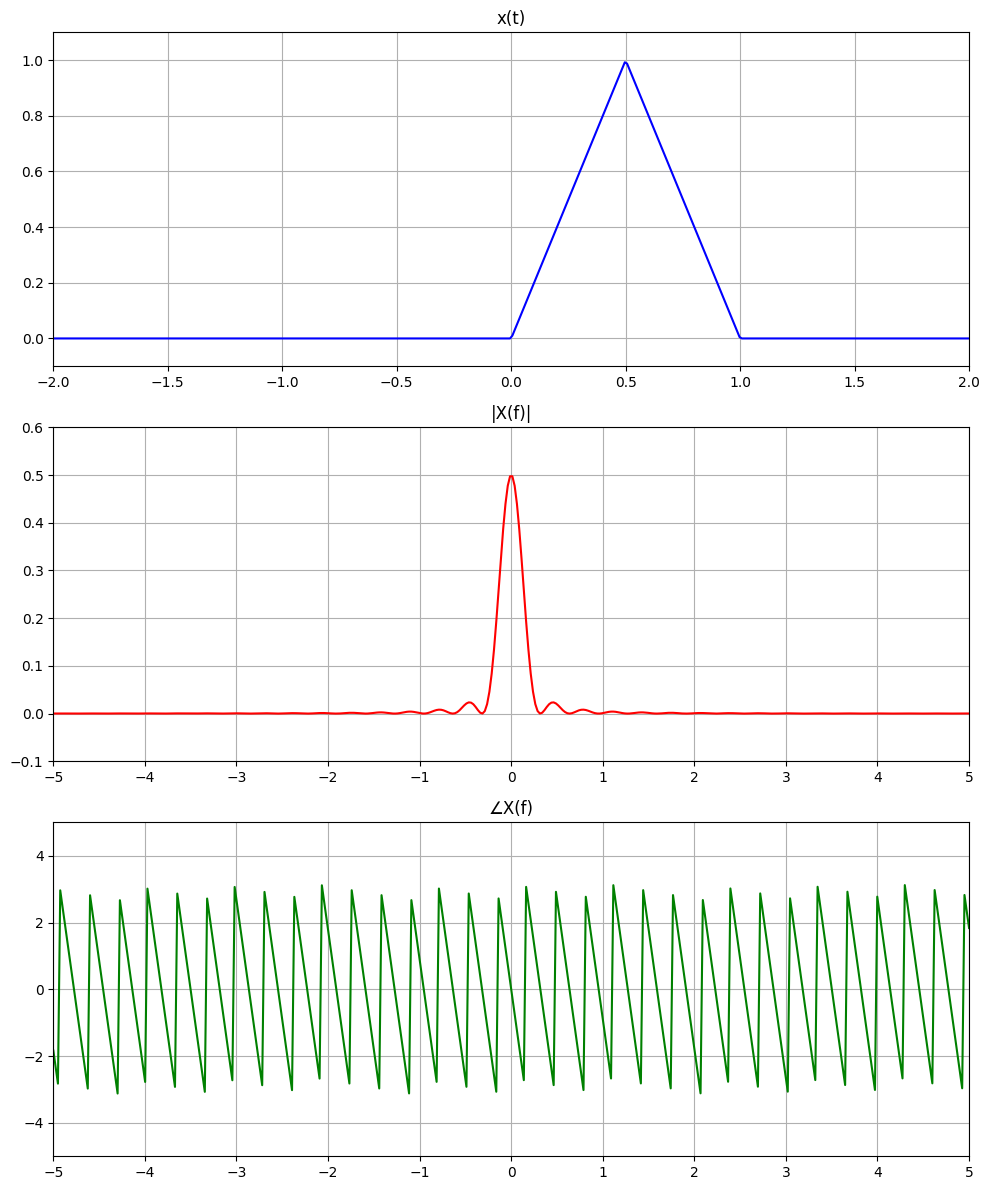

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir variables simbólicas
t, w, f = sp.symbols('t w f')

# Definir la función temporal x(t)
x = (2 * t) * (sp.Heaviside(t) - sp.Heaviside(t - 1/2)) + (2 * (-t + 1)) * (sp.Heaviside(t - 1/2) - sp.Heaviside(t - 1))

# Crear una figura con subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Graficar x(t)
t_vals = np.linspace(-2, 2, 400)
x_vals = [sp.re(x.subs(t, val)) for val in t_vals]
axs[0].plot(t_vals, x_vals, 'b')
axs[0].axis([-2, 2, -0.1, 1.1])
axs[0].grid()
axs[0].set_title('x(t)')

# Calcular la transformada de Fourier de x(t)
X1 = sp.fourier_transform(x, t, w)
X = X1.subs(w, 2 * sp.pi * f)

# Calcular el módulo de la transformada de Fourier
XM = sp.Abs(X)

# Graficar el módulo de la transformada de Fourier
f_vals = np.linspace(-5, 5, 400)
XM_vals = [sp.Abs(XM.subs(f, val)) for val in f_vals]  # Ensure values are real
axs[1].plot(f_vals, XM_vals, 'r')
axs[1].set_xticks(np.arange(-5, 6, 1))
axs[1].axis([-5, 5, -0.1, 0.6])
axs[1].grid()
axs[1].set_title('|X(f)|')

# Calcular la fase de la transformada de Fourier
XP = sp.arg(X)

# Graficar la fase de la transformada de Fourier
XP_vals = [sp.re(XP.subs(f, val)) for val in f_vals]
axs[2].plot(f_vals, XP_vals, 'g')
axs[2].set_xticks(np.arange(-5, 6, 1))
axs[2].axis([-5, 5, -5, 5])
axs[2].grid()
axs[2].set_title('∠X(f)')

plt.tight_layout()
plt.show()

## Actividad 1 - Intento de simplificacion de expresiones usando sympy para 1a

In [8]:
import sympy as sp

# Definir las variables simbólicas
w = sp.symbols('w')

# Definir la expresión del lado izquierdo de la ecuación
lhs = (sp.pi * sp.DiracDelta(w) + 1 / (sp.I * w)) * (1 - sp.exp(-sp.I * w))

# Crear la ecuación simbólica sin evaluar
eq1 = sp.Eq(lhs, 0, evaluate=False)

# Simplificar la ecuación
eq1_simplified = sp.simplify(eq1)

# Mostrar la ecuación simplificada
sp.pprint(eq1_simplified)

               ⎛ ⅈ⋅w    ⎞  -ⅈ⋅w    
(π⋅w⋅δ(w) - ⅈ)⋅⎝ℯ    - 1⎠⋅ℯ        
─────────────────────────────── = 0
               w                   


# Actividad 1
Actividad 1
a) Encuentre la TFTC para las siguientes señales usando tabla de transformada y propiedades.
b) Grafique el módulo y fase de las expresiones anteriores (referenciado en tp1 y tp2).
c) Vuelva a realizar las gráficas de las señales según el ejemplo1 utilizando Octave/Matlab/Python.

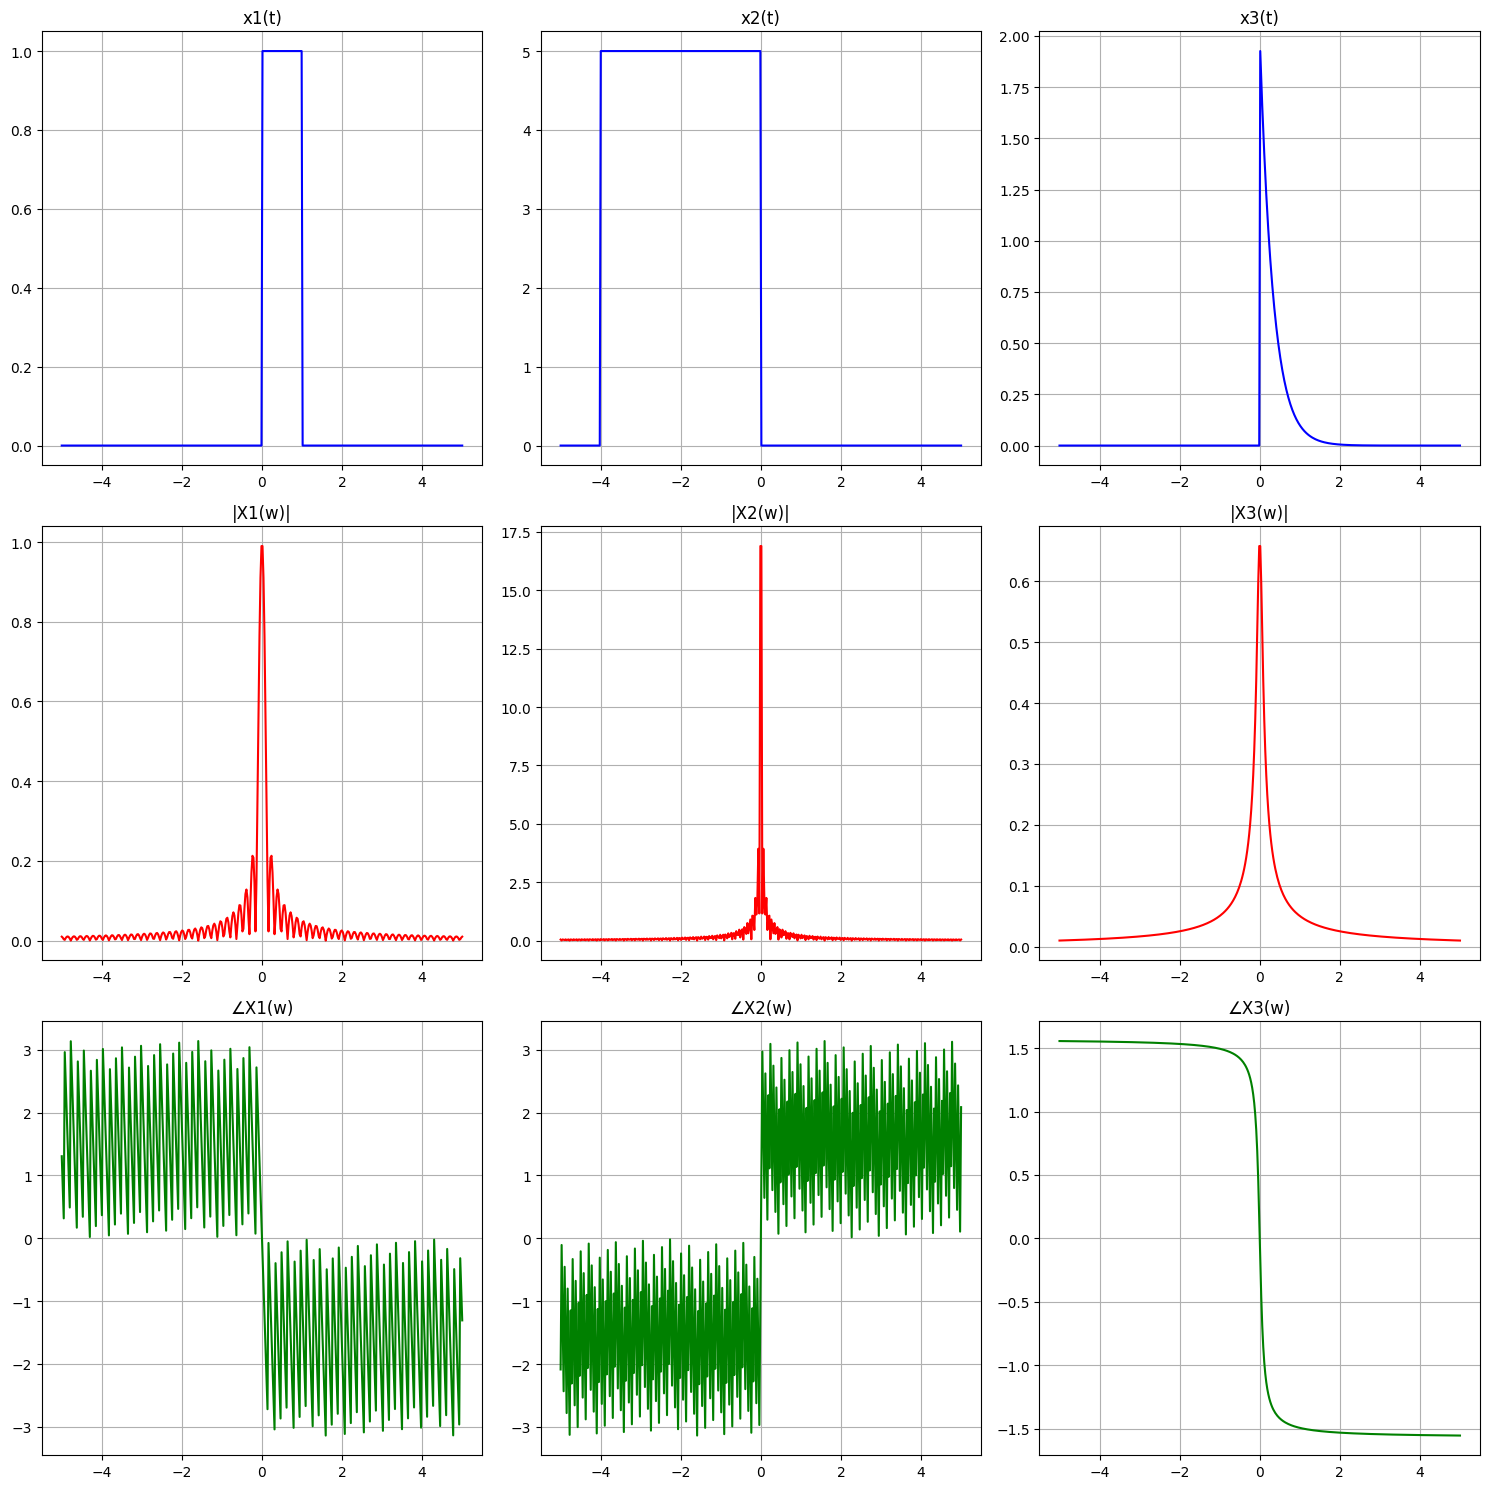

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def rect(t):
    return sp.Heaviside(t + 1/2) - sp.Heaviside(t - 1/2)

# Definir las variables simbólicas
t, w, f = sp.symbols('t w f')

# Defino las funciones de cada inciso
x1 = sp.Heaviside(t) - sp.Heaviside(t - 1)
x2 = 5 * rect((t+2)/4)
x3 = 2 * sp.exp(-3 * t) * sp.Heaviside(3 * t)

# Calcular las transformadas de Fourier de las funciones
X1 = sp.fourier_transform(x1, t, w)
X2 = sp.fourier_transform(x2, t, w)
X3 = sp.fourier_transform(x3, t, w)
# Substituir
X1_f = X1.subs(w, 2 * sp.pi * f)
X2_f = X2.subs(w, 2 * sp.pi * f)
X3_f = X3.subs(w, 2 * sp.pi * f)

# Calcular el modulo de la transformada de Fourier
XM1 = sp.Abs(X1_f)
XM2 = sp.Abs(X2_f)
XM3 = sp.Abs(X3_f)
# Calcular la fase de la transformada de Fourier
XP1 = sp.arg(X1_f)
XP2 = sp.arg(X2_f)
XP3 = sp.arg(X3_f)

# Crear una figura con subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Definir los valores de t y w para graficar
t_vals = np.linspace(-5, 5, 400)
f_vals = np.linspace(-5, 5, 400)

# Graficar x1(t), |X1(w)| y ∠X1(w)
x1_vals = [sp.re(x1.subs(t, val)) for val in t_vals]
XM1_vals = [sp.Abs(XM1.subs(f, val)) for val in f_vals]
XP1_vals = [sp.N(XP1.subs(f, val)) for val in f_vals]

axs[0, 0].plot(t_vals, x1_vals, 'b')
axs[0, 0].set_title('x1(t)')
axs[0, 0].grid()

axs[1, 0].plot(f_vals, XM1_vals, 'r')
axs[1, 0].set_title('|X1(f)|')
axs[1, 0].grid()

axs[2, 0].plot(f_vals, XP1_vals, 'g')
axs[2, 0].set_title('fase de X1(f)')
axs[2, 0].grid()

# Graficar x2(t), |X2(w)| y ∠X2(w)
x2_vals = [sp.re(x2.subs(t, val)) for val in t_vals]
XM2_vals = [sp.Abs(XM2.subs(f, val)) for val in f_vals]
XP2_vals = [sp.re(XP2.subs(f, val)) for val in f_vals]

axs[0, 1].plot(t_vals, x2_vals, 'b')
axs[0, 1].set_title('x2(t)')
axs[0, 1].grid()

axs[1, 1].plot(f_vals, XM2_vals, 'r')
axs[1, 1].set_title('|X2(f)|')
axs[1, 1].grid()

axs[2, 1].plot(f_vals, XP2_vals, 'g')
axs[2, 1].set_title('fase de X2(f)')
axs[2, 1].grid()

# Graficar x3(t), |X3(w)| y ∠X3(w)
x3_vals = [sp.re(x3.subs(t, val)) for val in t_vals]
XM3_vals = [sp.Abs(XM3.subs(f, val)) for val in f_vals]
XP3_vals = [sp.re(XP3.subs(f, val)) for val in f_vals]

axs[0, 2].plot(t_vals, x3_vals, 'b')
axs[0, 2].set_title('x3(t)')
axs[0, 2].grid()

axs[1, 2].plot(f_vals, XM3_vals, 'r')
axs[1, 2].set_title('|X3(f)|')
axs[1, 2].grid()

axs[2, 2].plot(f_vals, XP3_vals, 'g')
axs[2, 2].set_title('fase de X3(f)')
axs[2, 2].grid()

plt.tight_layout()
plt.show()

# Actividad 3

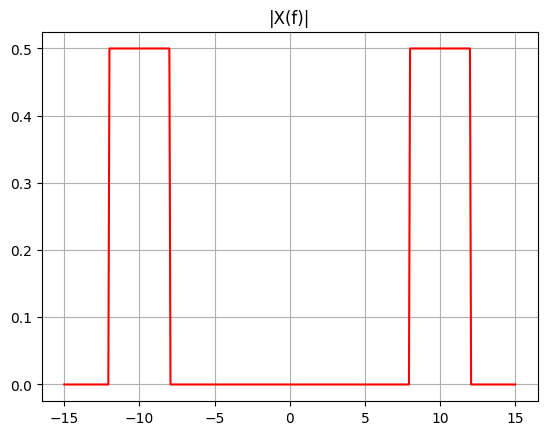

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Defino las variables 
t, f = sp.symbols('t f')
f0 = 10
F1 = 2
def rect(t):
    return sp.Heaviside(t + 1/2) - sp.Heaviside(t - 1/2)
Z = rect(t/(2*F1))

# transformada de Fourier calculada a mano
X = Z.subs(t, f-f0)/2 + Z.subs(t, f+f0)/2

# Graficar el modulo de X
f_vals = np.linspace(-15, 15, 400)
XM = [sp.Abs(X.subs(f, val)) for val in f_vals]
plt.plot(f_vals, XM, 'r')
plt.title('|X(f)|')
plt.grid()
plt.show()

# Actividad 4

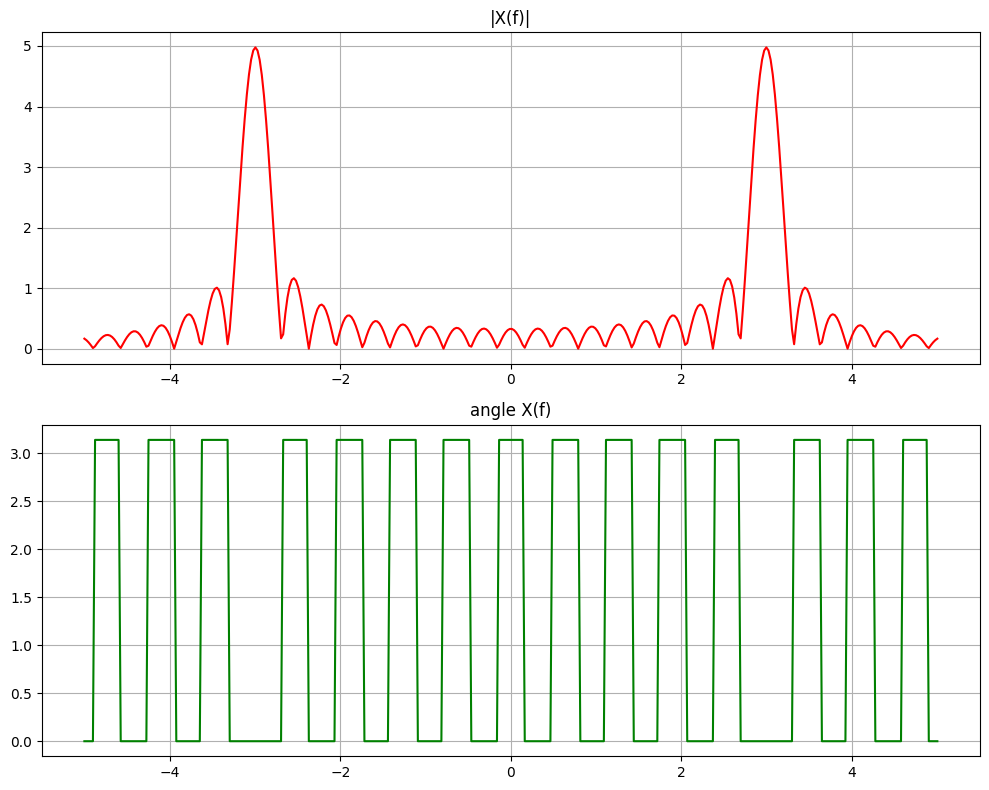

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Defino las variables 
f, t = sp.symbols('f t')
f0 = 3
x = sp.cos(2 * sp.pi * f0 * t) # TODO! Comparo con la señal directamente o con la transform. de la señal sin cortar?
X = 5 * (sp.sinc(10 * (f - f0)) + sp.sinc(10 * (f + f0)))
# Graficar el modulo y fase de X
f_vals = np.linspace(-5, 5, 400)
XM = [sp.Abs(X.subs(f, val)) for val in f_vals]
XP = [sp.arg(X.subs(f, val)) for val in f_vals]

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(f_vals, XM, 'r')
axs[0].set_title('|X(f)|')
axs[0].grid()

axs[1].plot(f_vals, XP, 'g')
axs[1].set_title('angle X(f)')
axs[1].grid()

plt.tight_layout()
plt.show()

# Actividad 8